In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


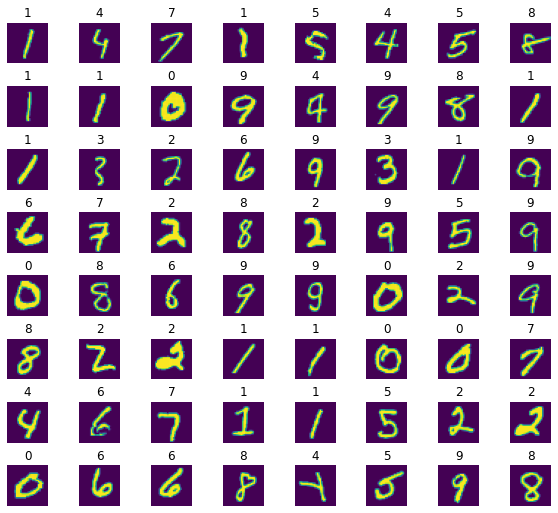

In [3]:
m=x_train.shape[0]

fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    random_index=np.random.randint(m)
    
    img=x_train[random_index]
    ax.imshow(img)
    ax.set_title(y_train[random_index])
    ax.set_axis_off()
    
    #fig.suptitle("Label, image", fontsize=14)

In [4]:
x_train_flat=x_train.reshape(x_train.shape[0],-1)
x_test_flat=x_test.reshape(x_test.shape[0],-1)

In [5]:
x_test_flat.shape

(10000, 784)

In [6]:
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer((28*28,)),
    tf.keras.layers.Dense(25,activation='relu'),
    tf.keras.layers.Dense(15,activation='relu'),
    tf.keras.layers.Dense(10,activation='linear')
])
model.compile(#optimizer='adam' or 
            optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy']
)


2022-09-04 05:55:45.834843: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 15)                390       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train_flat,y_train,epochs=40)

2022-09-04 05:55:46.077689: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9288 - accuracy: 0.4584
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9892 - accuracy: 0.6346
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7393 - accuracy: 0.7419
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5327 - accuracy: 0.8422
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3713 - accuracy: 0.8949
Epoch 6/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3001 - accuracy: 0.9176
Epoch 7/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2563 - accuracy: 0.9302
Epoch 8/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2193 - accuracy: 0.9402
Epoch 9/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2049 - accuracy: 0.9424
Epoch 10/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.187

In [9]:
model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2491 - accuracy: 0.9494


[0.24913102388381958, 0.949400007724762]

In [10]:
output=model.predict(x_test_flat)


In [11]:
y_pred=np.argmax(tf.nn.softmax(output),axis=1)

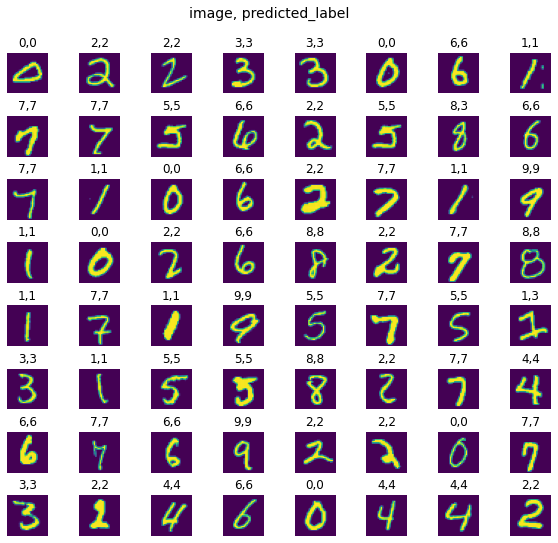

In [12]:
m=x_test.shape[0]

fig,axes=plt.subplots(8,8,figsize=(8,8))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    random_index=np.random.randint(m)
    
    img=x_test[random_index]
    
    ax.imshow(img)
    ax.set_title(f"{y_test[random_index]},{y_pred[random_index]}")
    ax.set_axis_off()
    
    fig.suptitle("image, predicted_label", fontsize=14)